In [35]:
from keras.layers import Dense, Input
from keras.layers import Conv1D, Flatten, Lambda
from keras.layers import Reshape, UpSampling1D
from keras.models import Model
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [570]:
x_all = np.load('x_sigs.npy')
fx = np.load('features.npy')
y_mc = np.load('y_mc.npy')

# binary class labels
y_b = np.copy(y_mc)
y_b[y_b<=1] = 0
y_b[y_b>=2] = 1

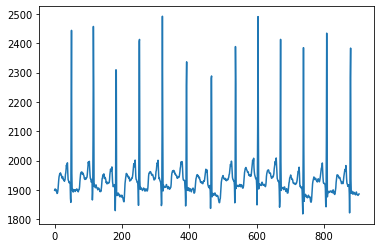

In [571]:
import matplotlib.pyplot as plt
plt.plot(x_all[0])
plt.show()

In [572]:
y_b[0]

0

In [573]:
y_mc[y_mc==0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

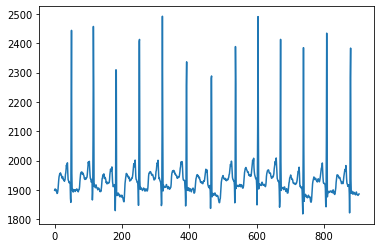

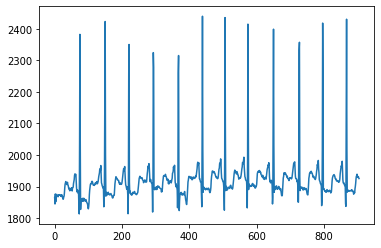

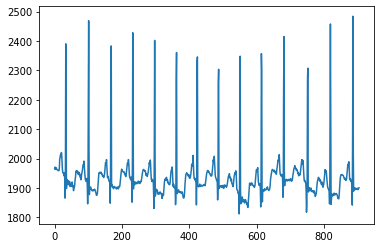

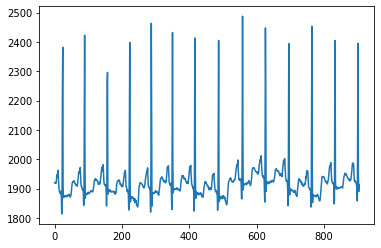

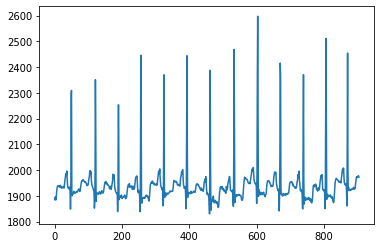

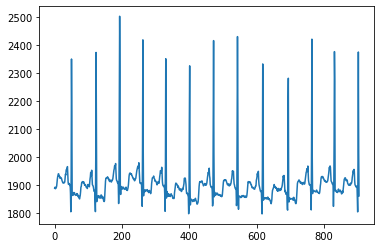

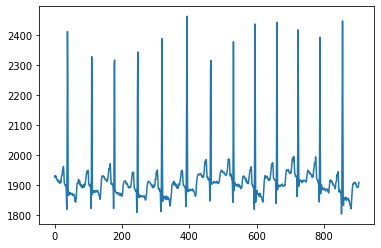

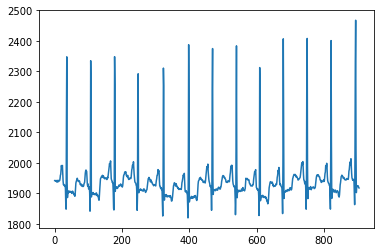

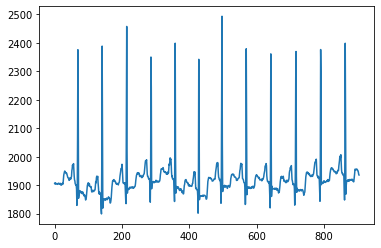

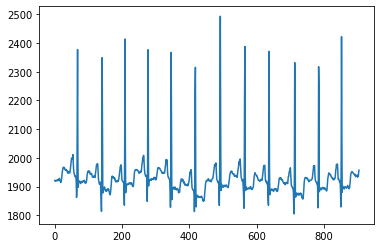

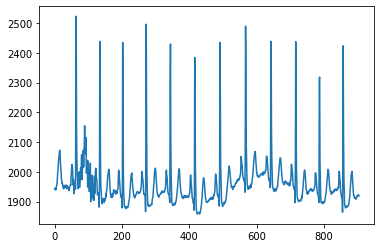

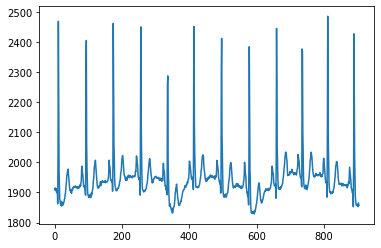

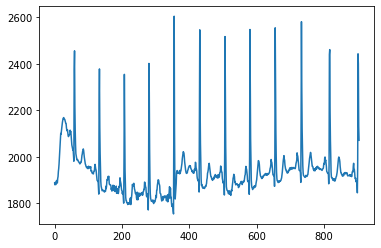

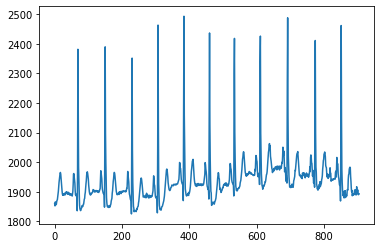

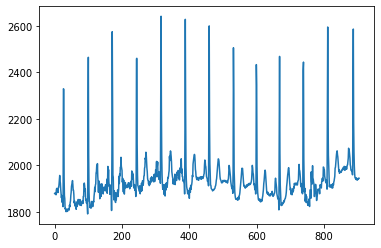

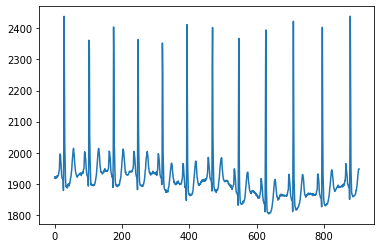

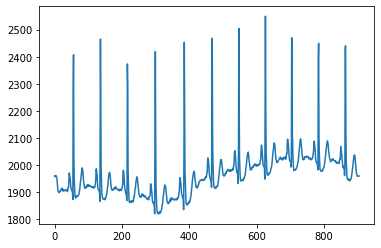

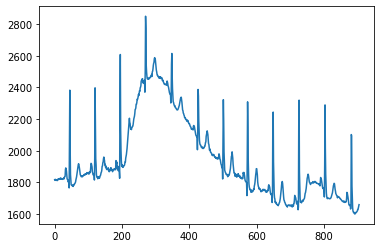

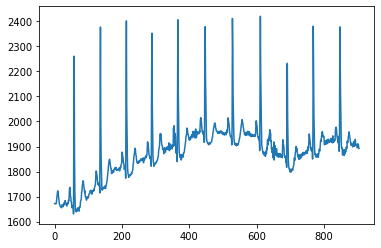

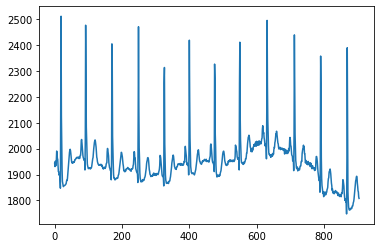

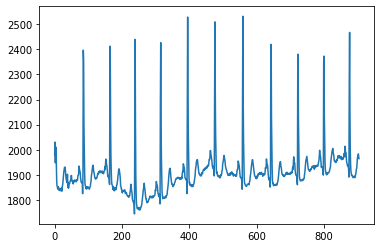

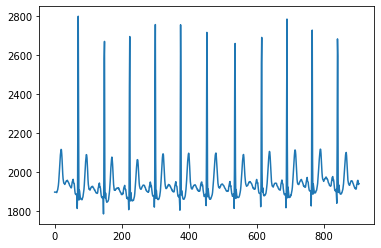

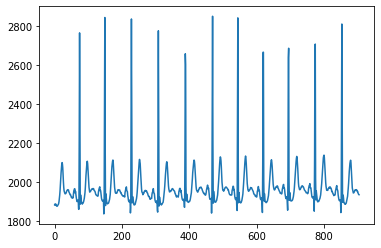

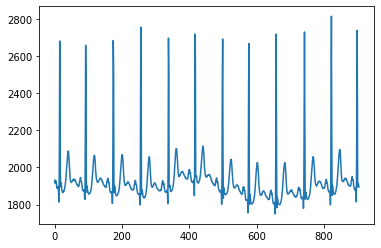

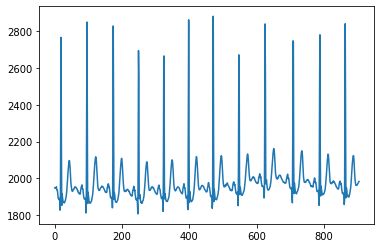

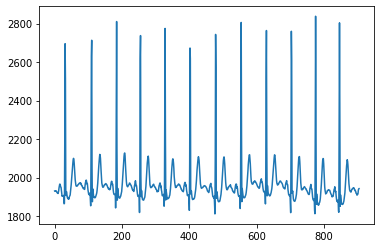

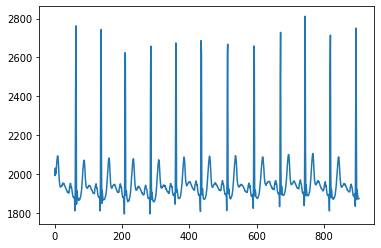

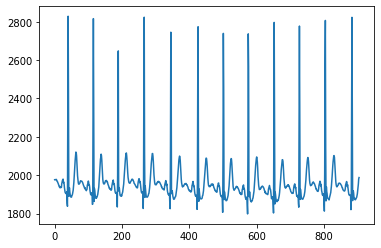

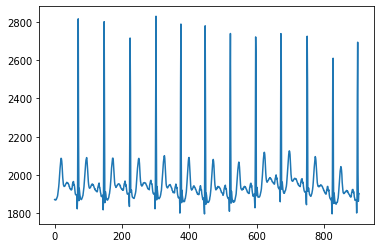

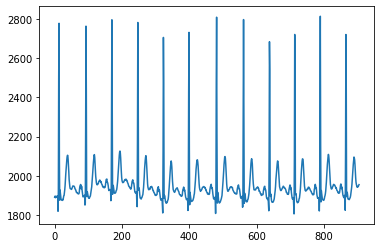

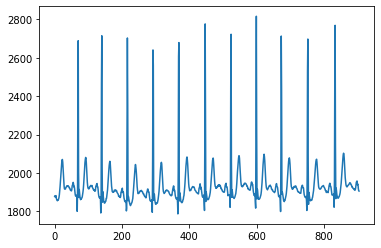

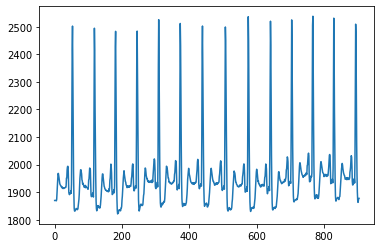

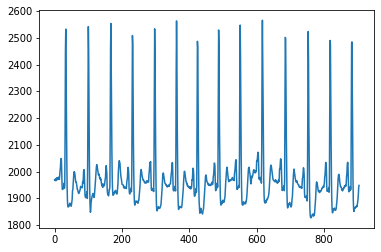

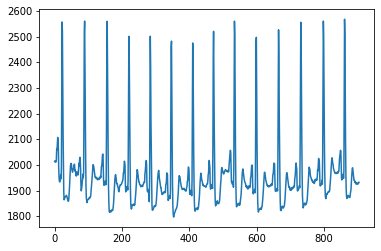

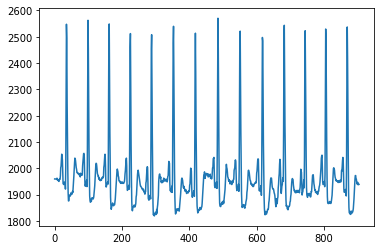

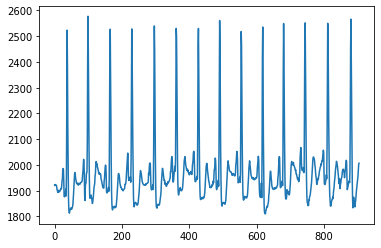

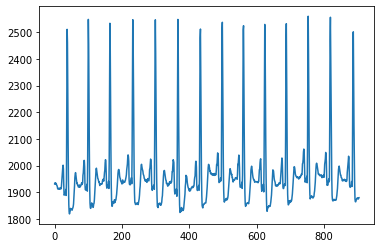

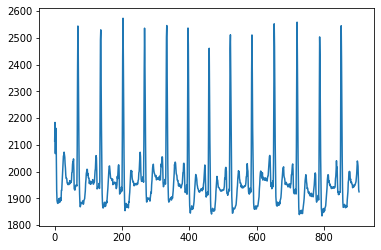

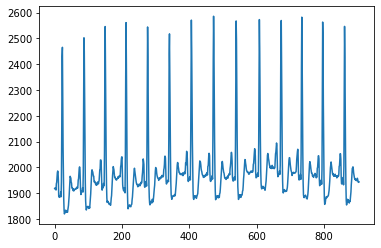

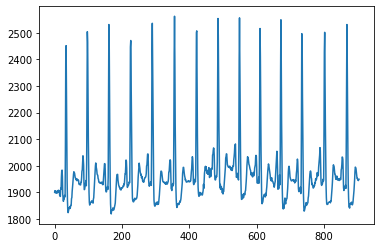

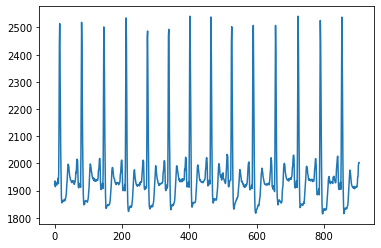

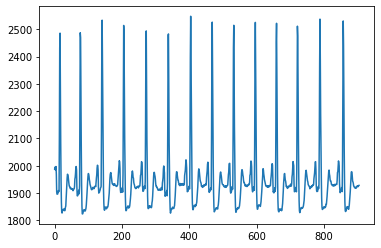

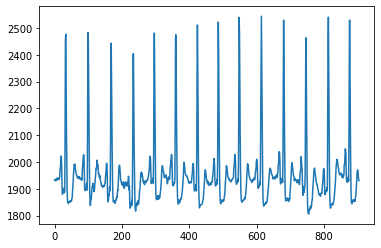

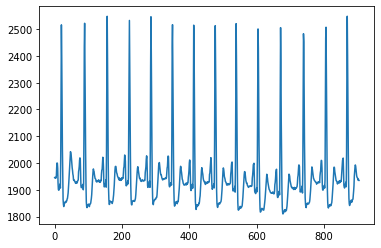

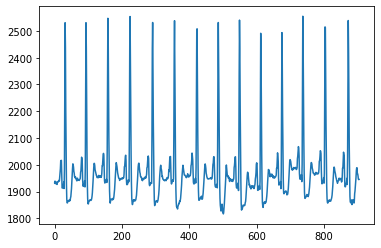

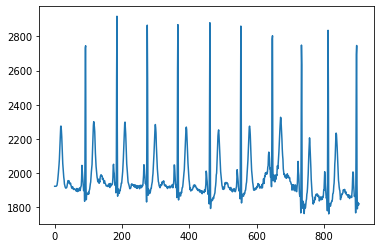

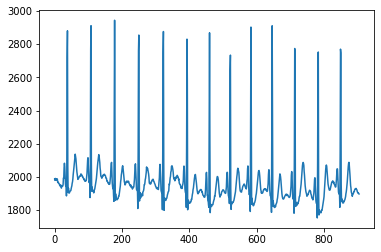

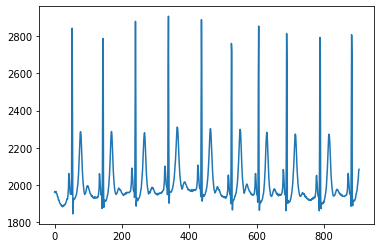

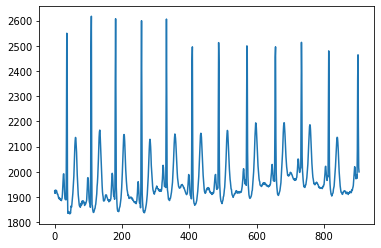

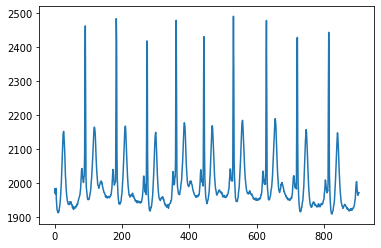

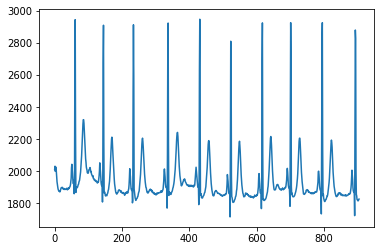

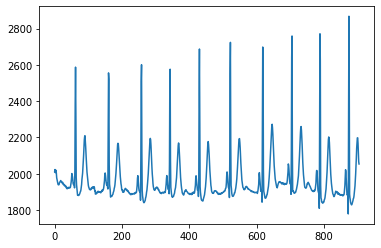

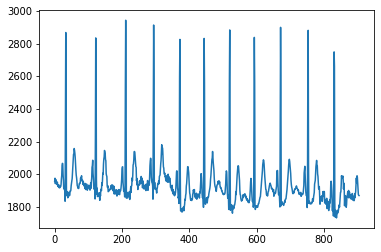

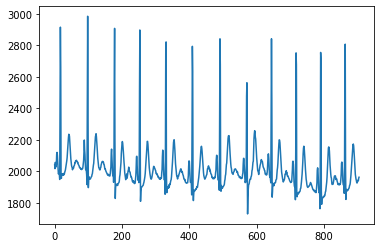

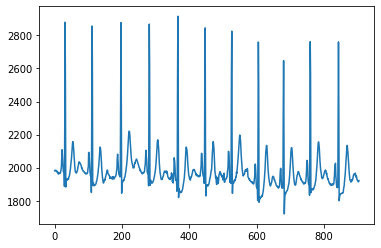

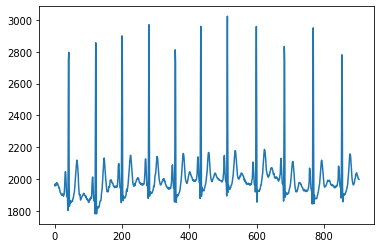

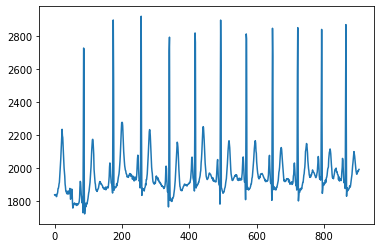

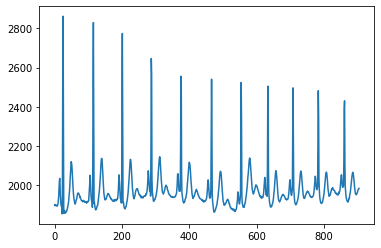

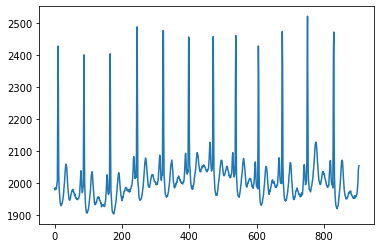

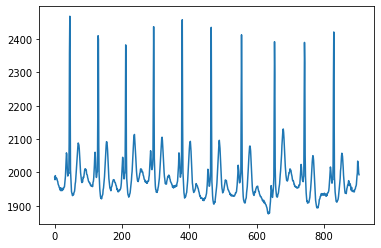

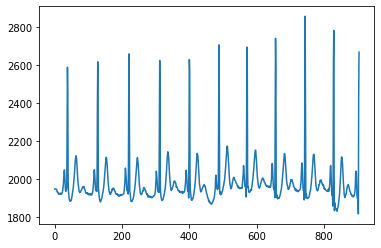

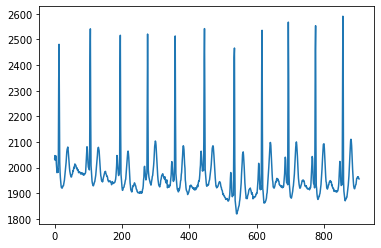

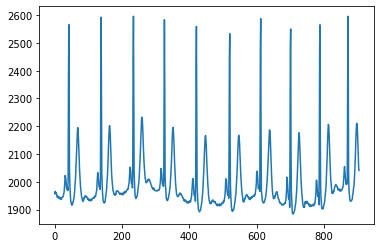

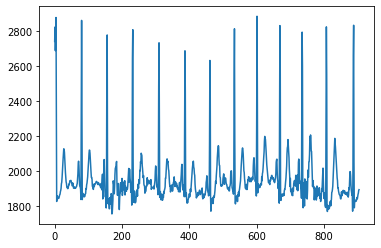

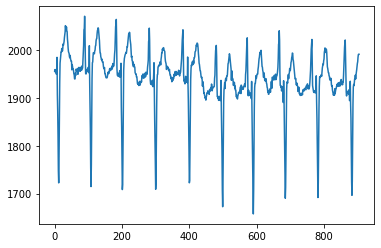

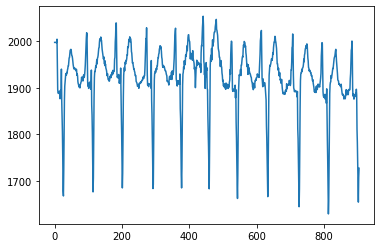

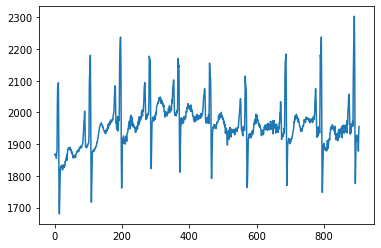

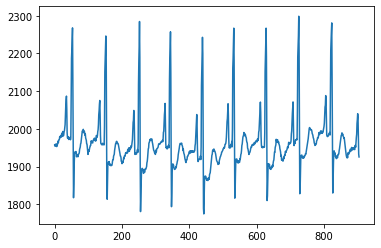

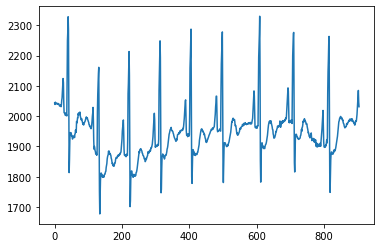

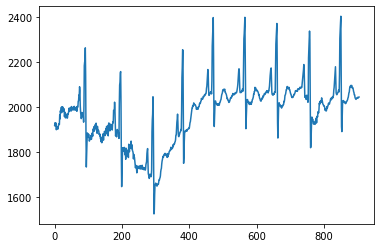

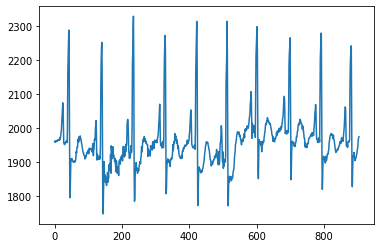

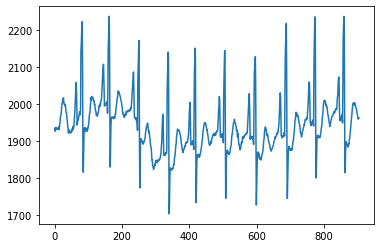

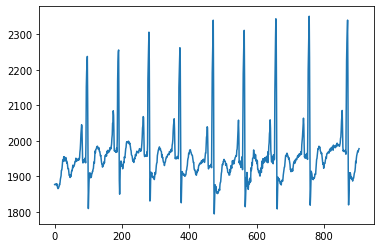

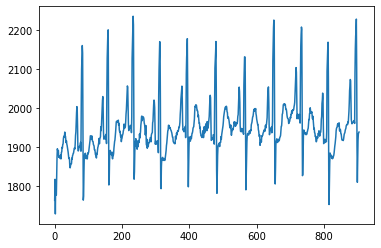

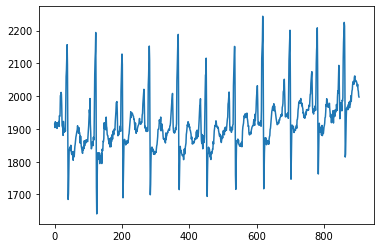

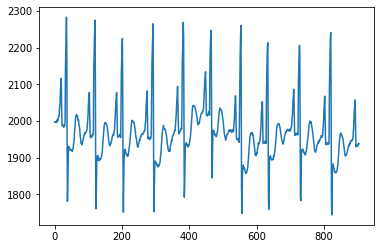

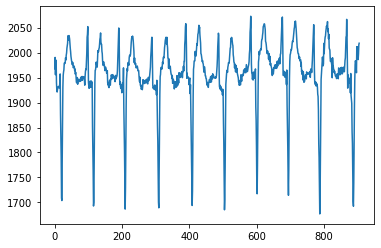

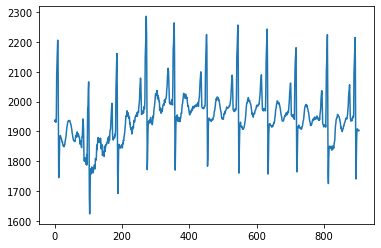

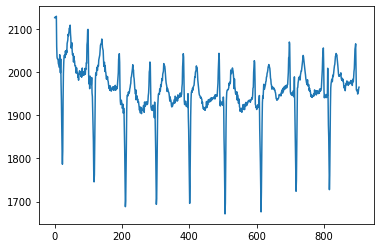

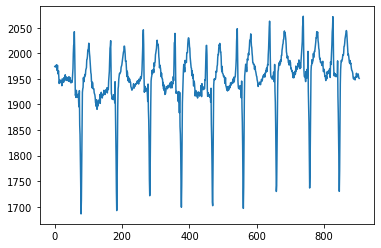

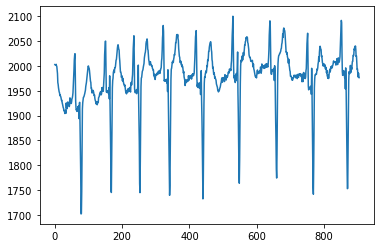

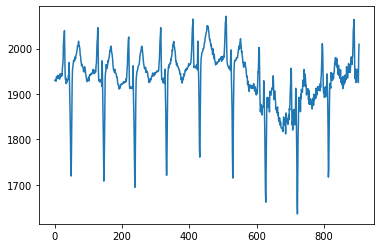

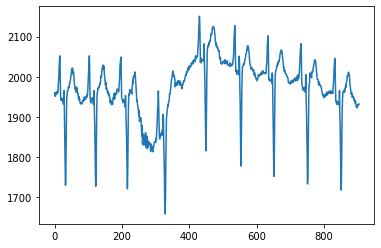

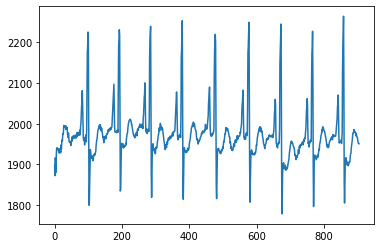

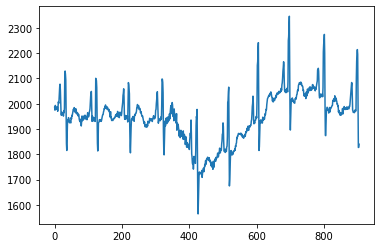

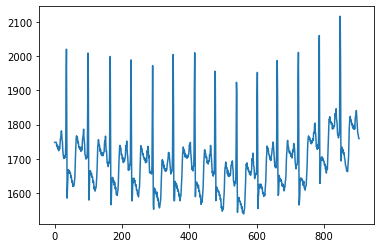

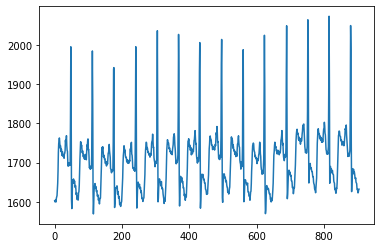

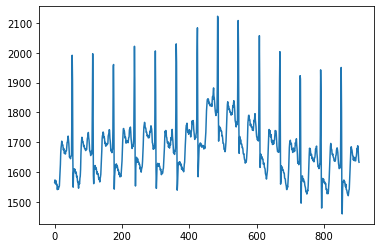

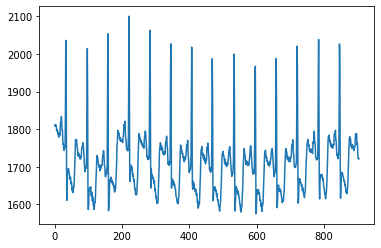

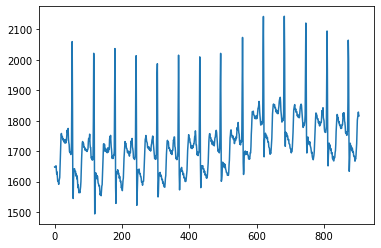

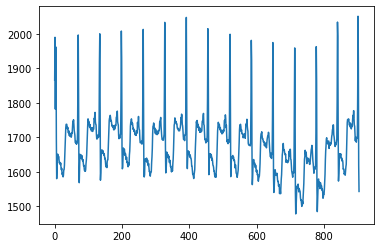

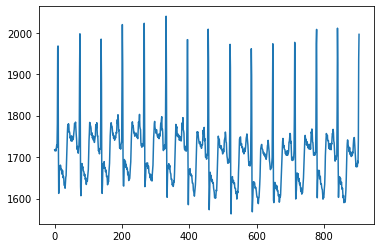

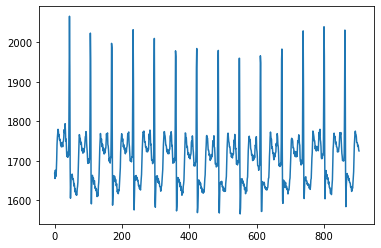

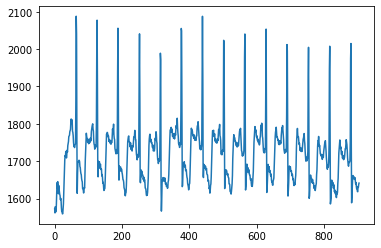

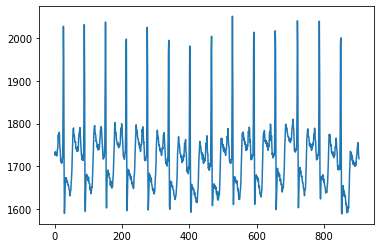

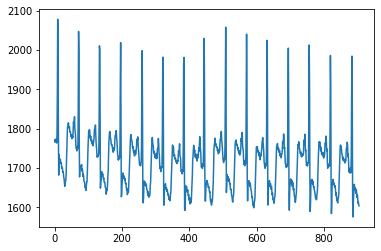

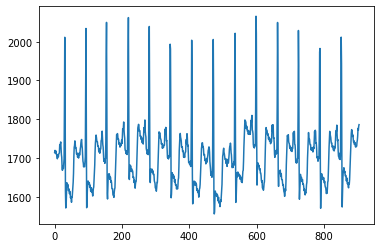

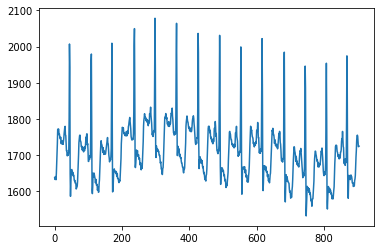

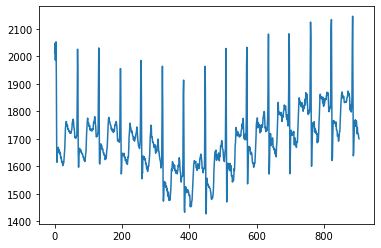

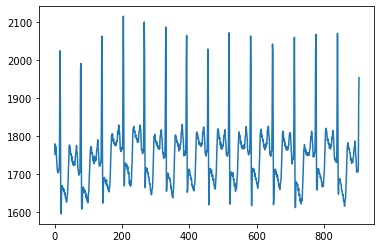

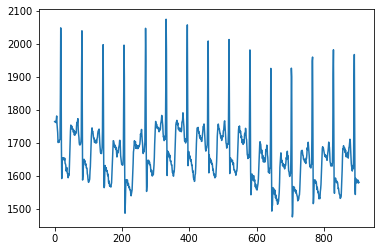

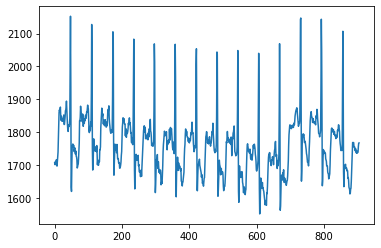

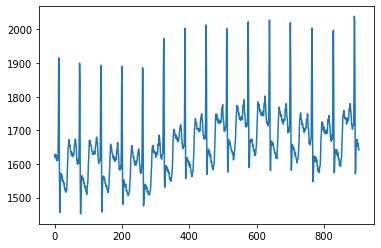

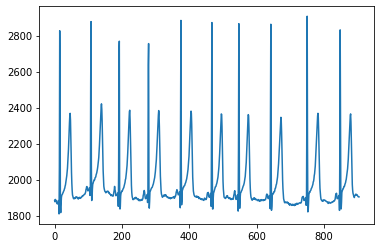

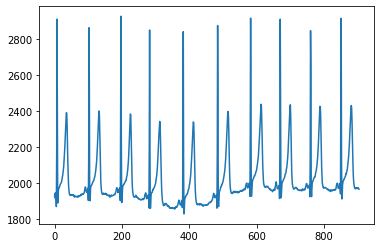

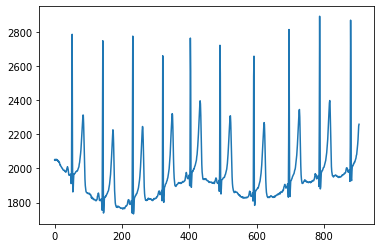

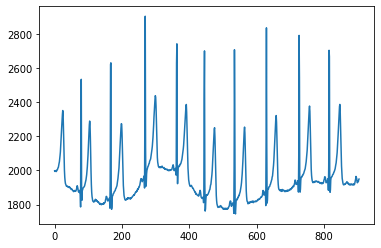

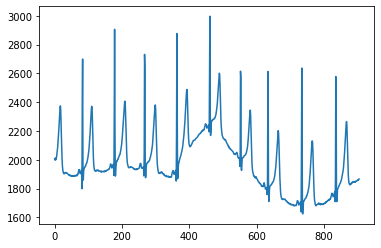

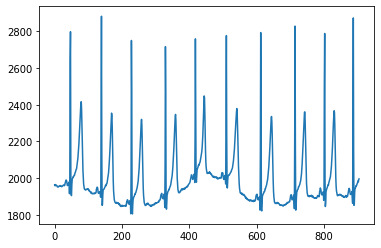

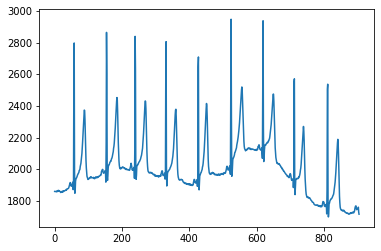

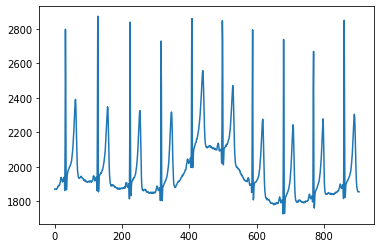

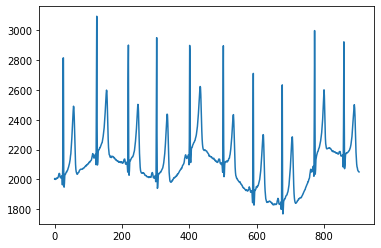

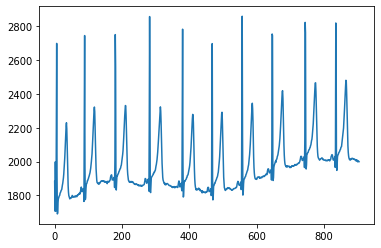

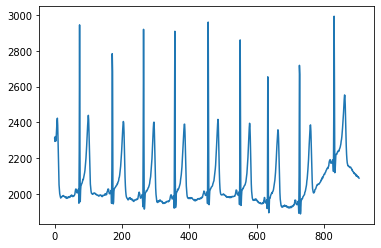

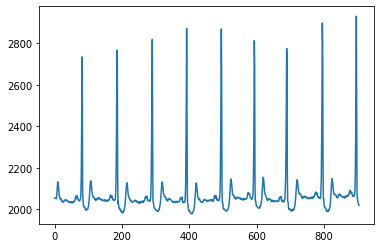

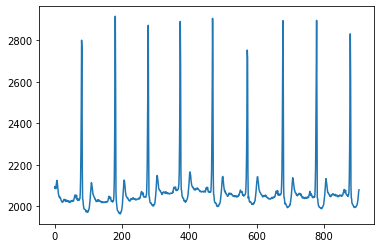

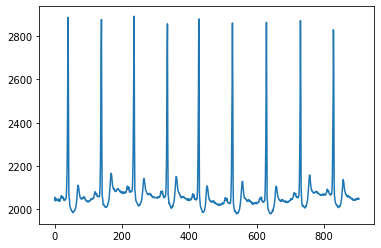

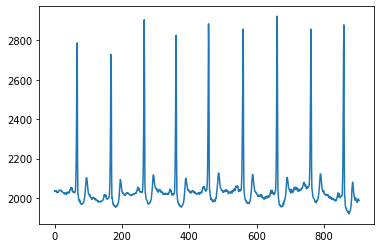

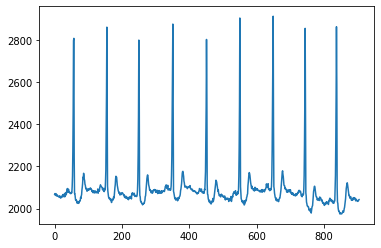

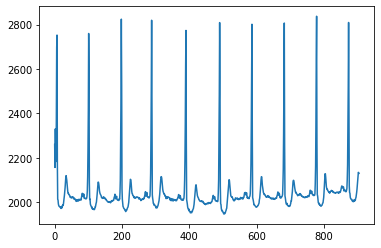

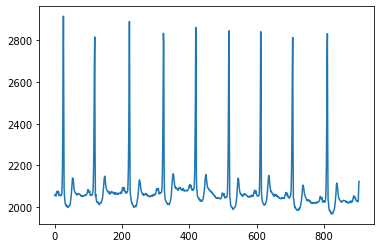

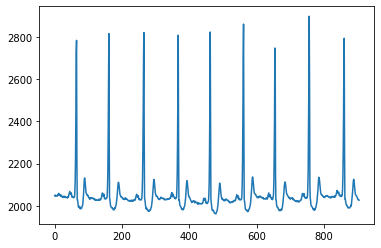

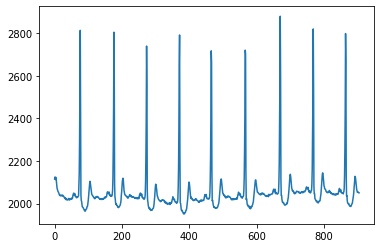

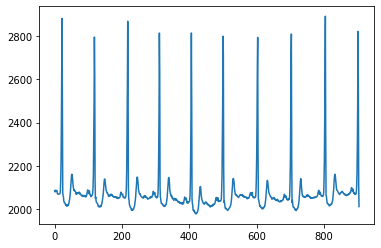

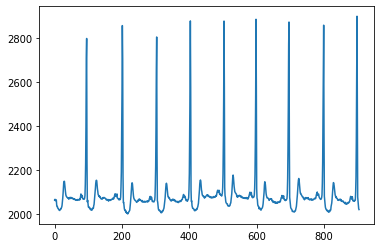

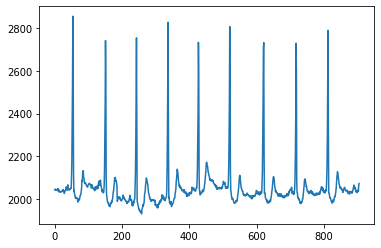

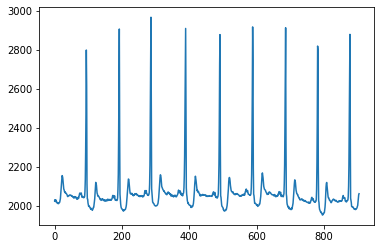

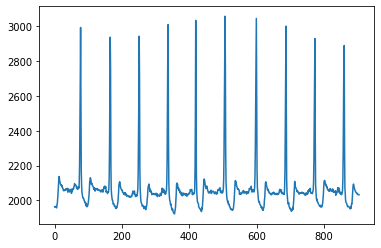

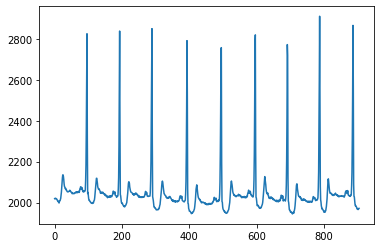

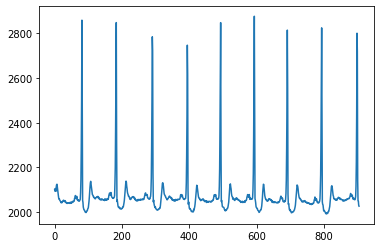

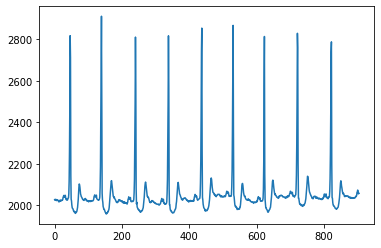

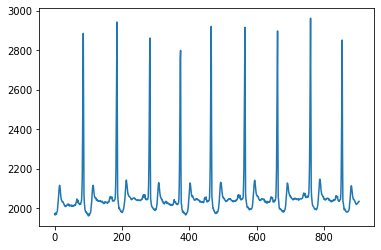

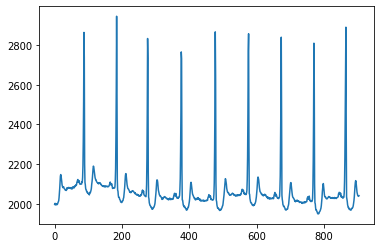

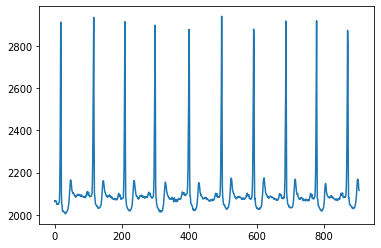

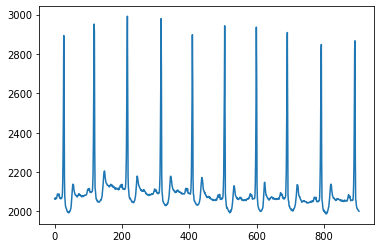

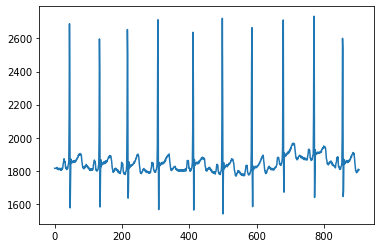

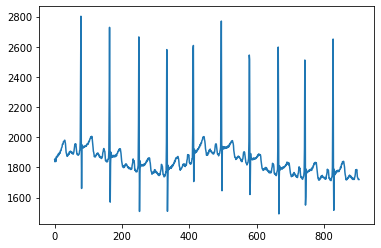

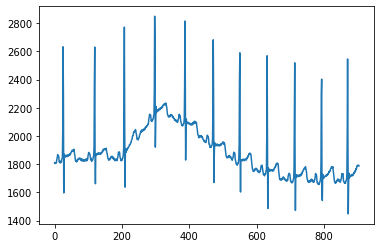

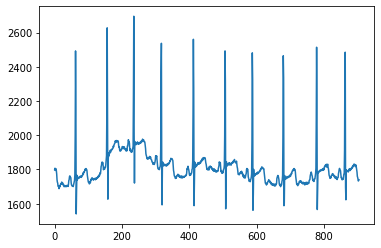

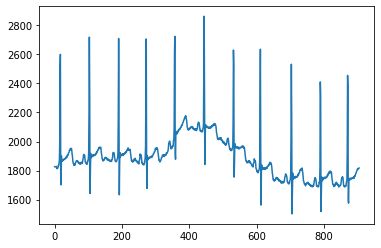

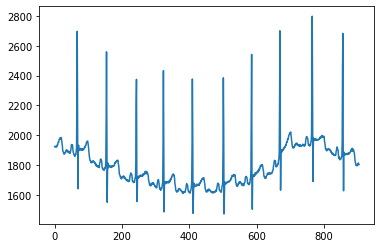

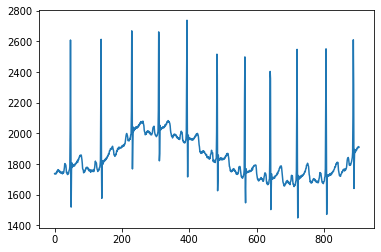

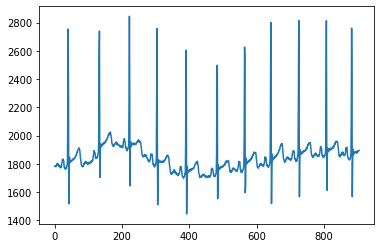

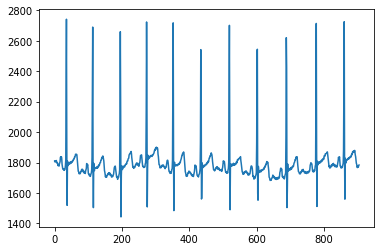

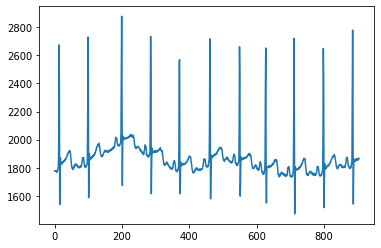

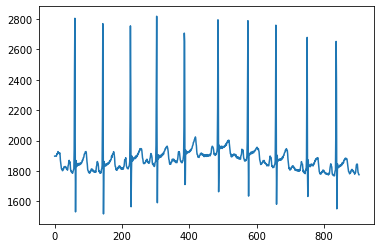

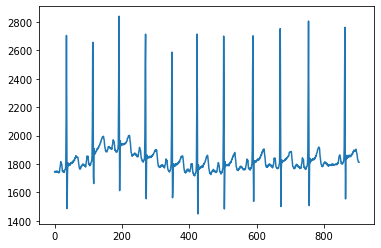

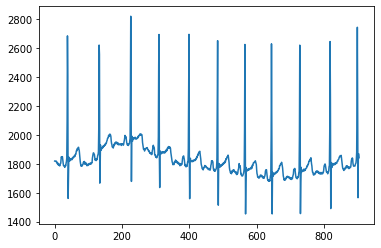

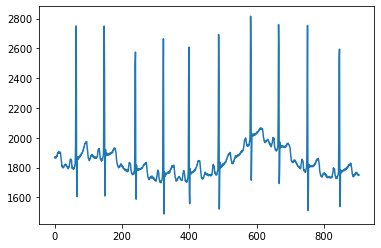

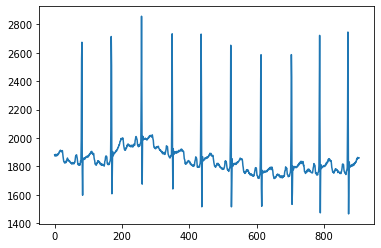

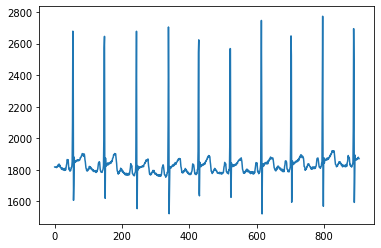

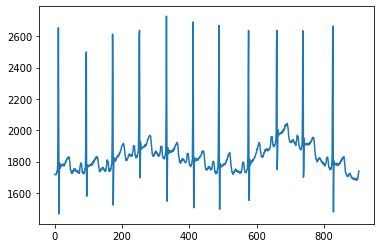

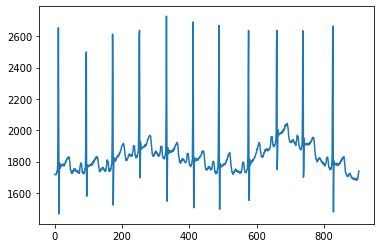

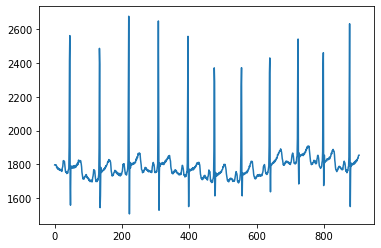

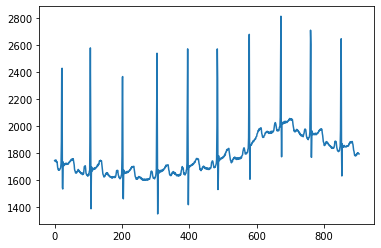

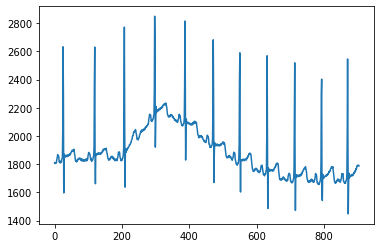

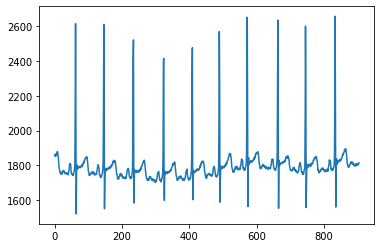

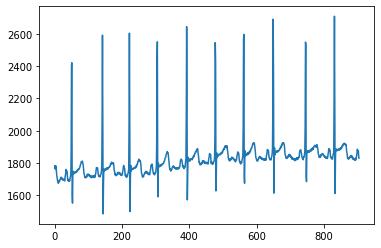

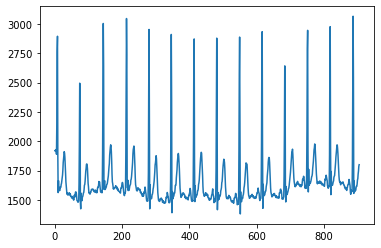

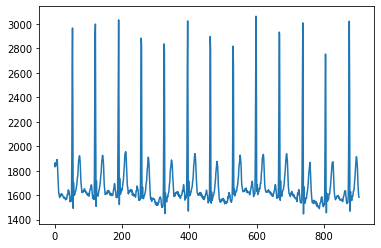

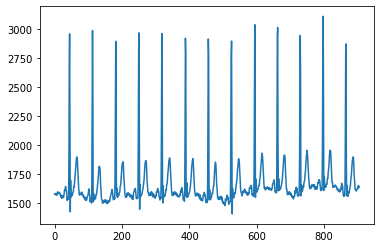

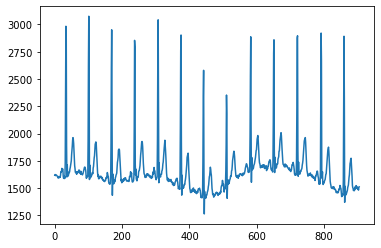

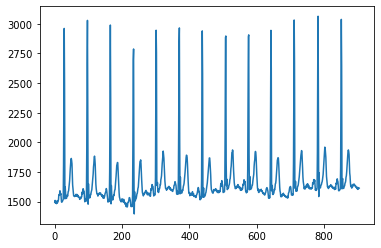

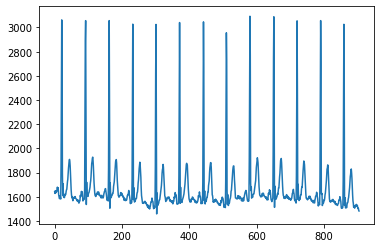

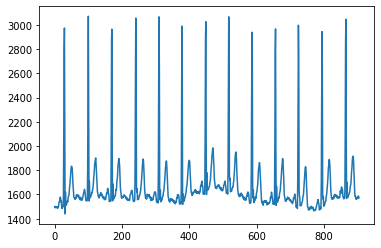

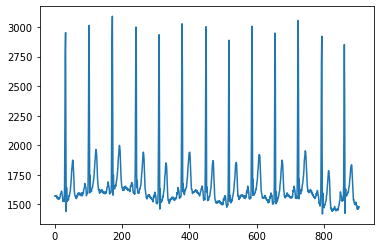

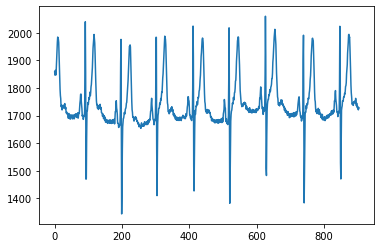

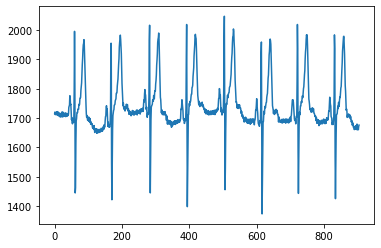

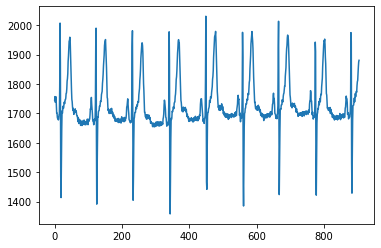

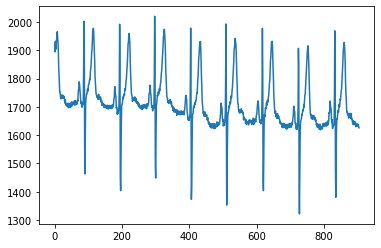

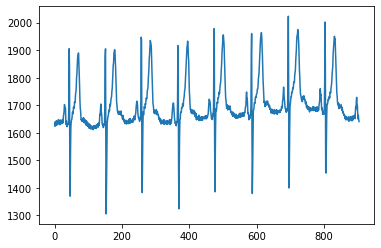

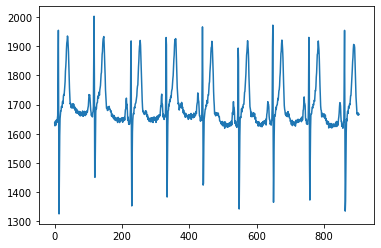

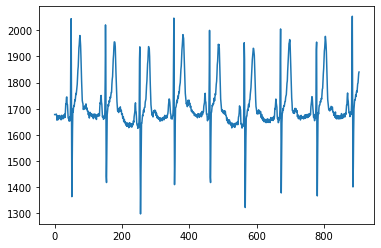

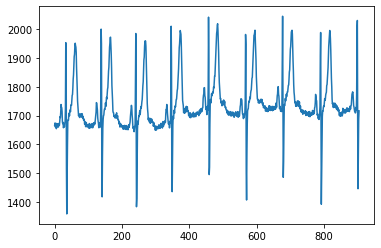

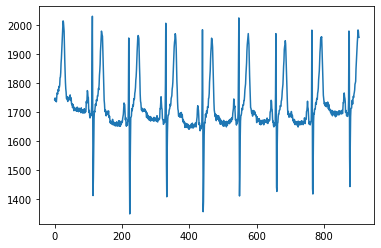

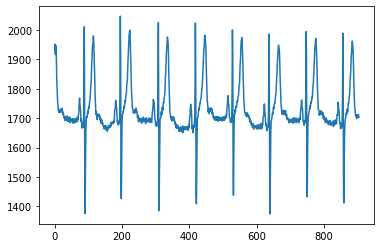

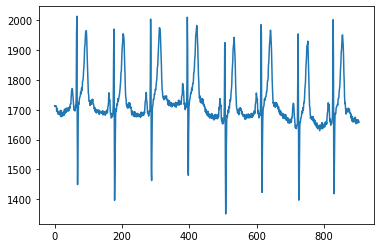

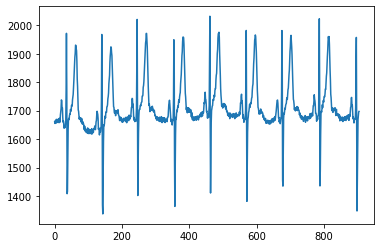

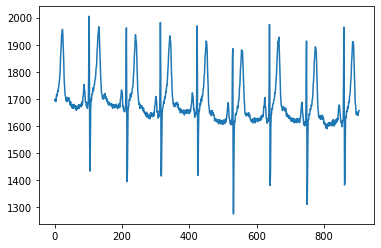

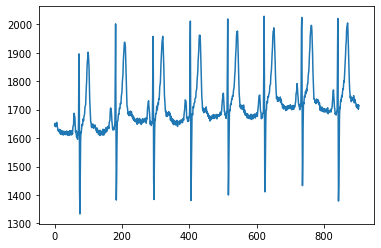

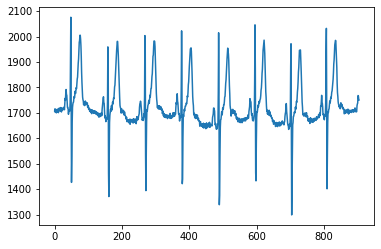

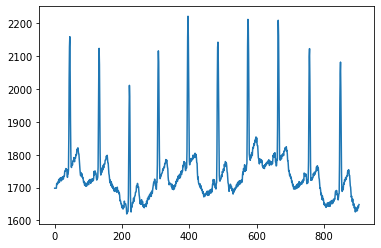

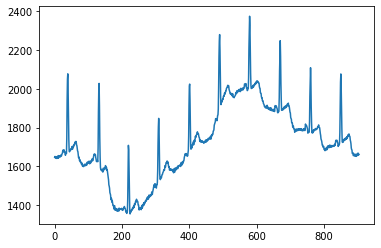

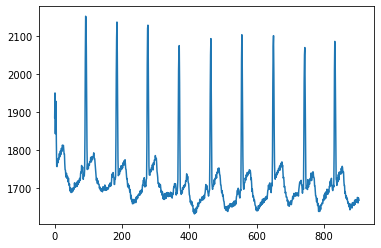

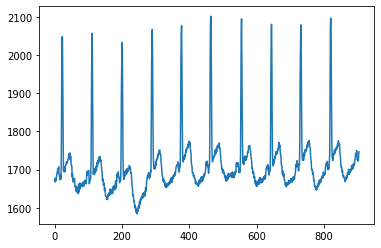

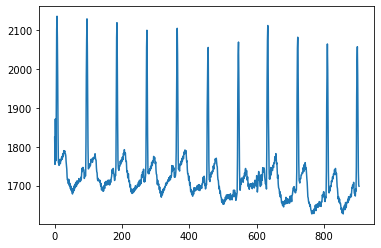

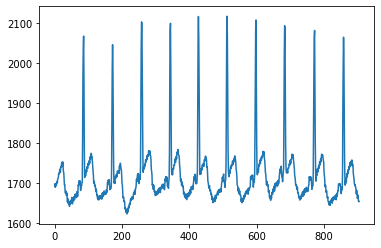

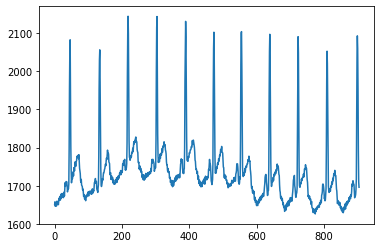

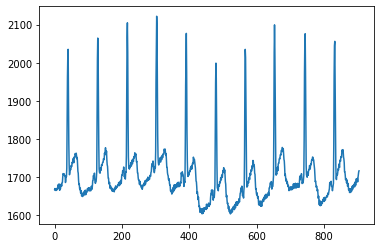

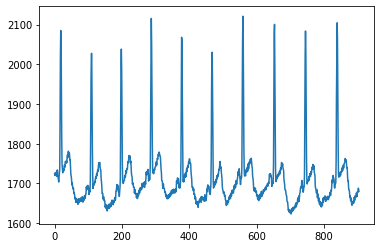

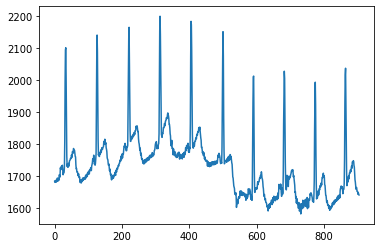

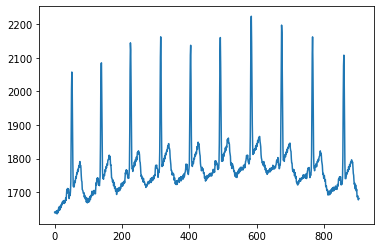

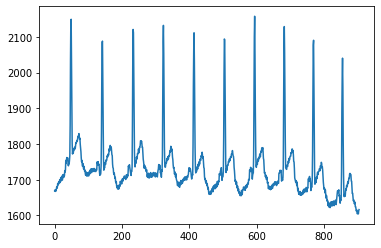

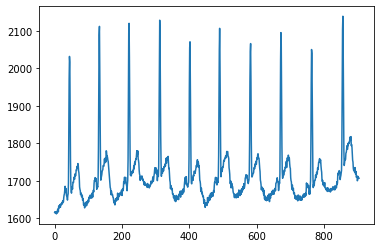

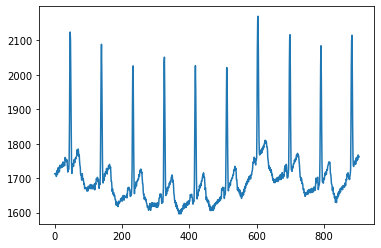

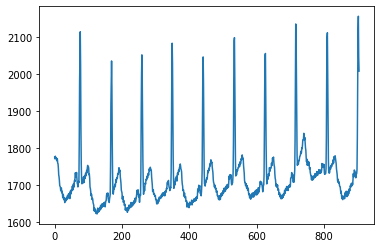

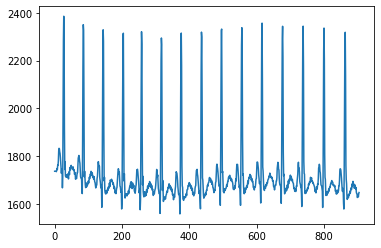

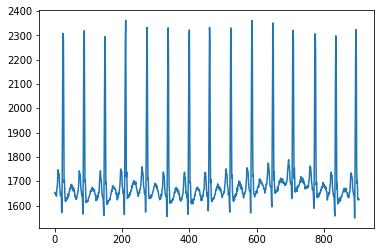

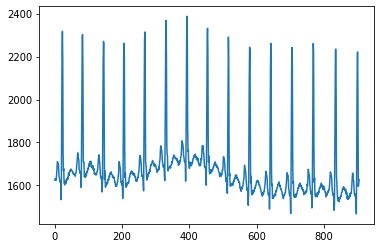

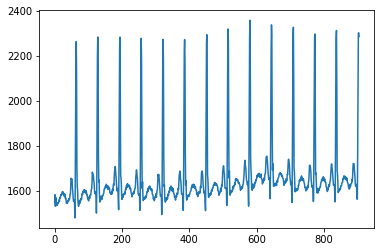

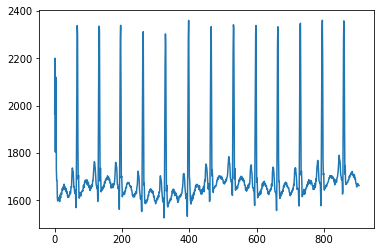

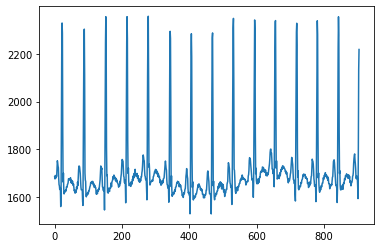

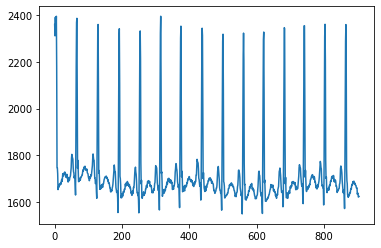

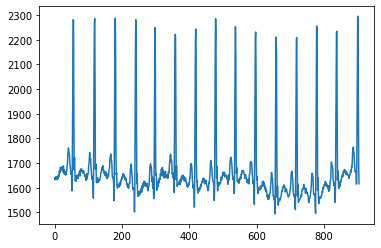

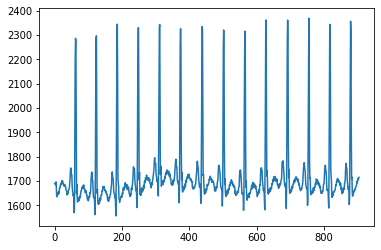

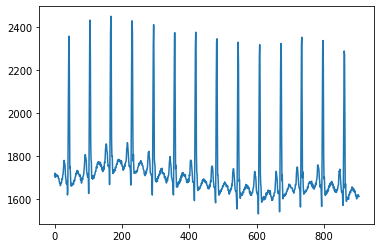

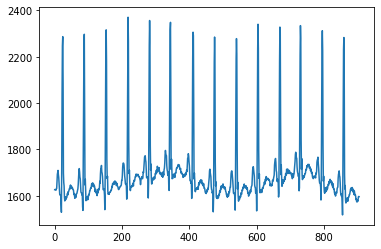

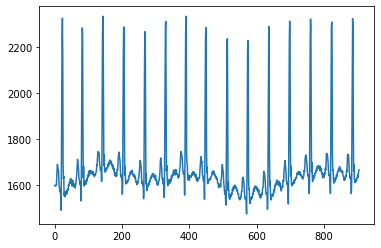

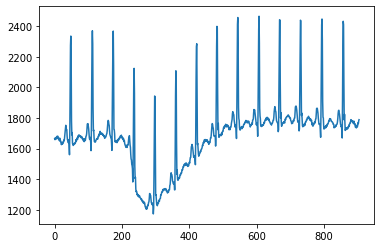

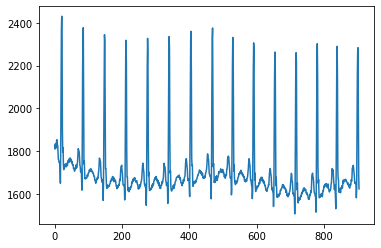

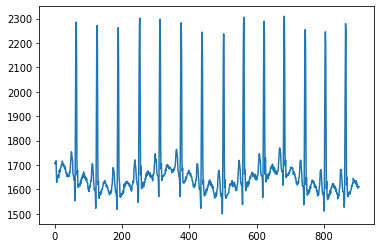

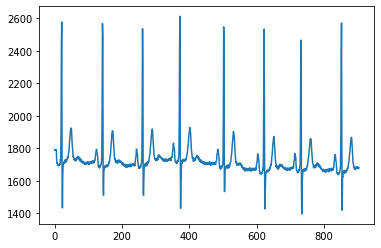

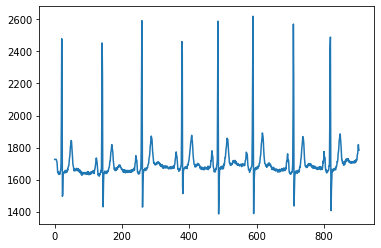

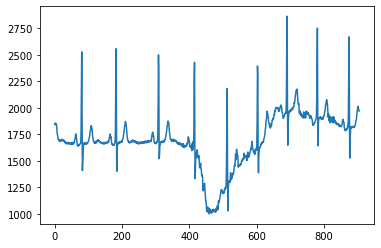

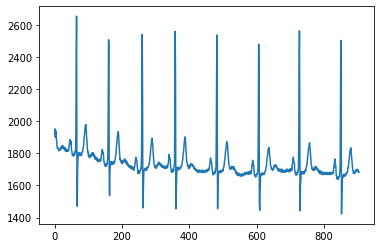

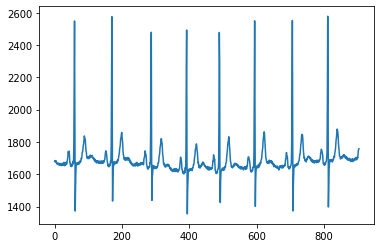

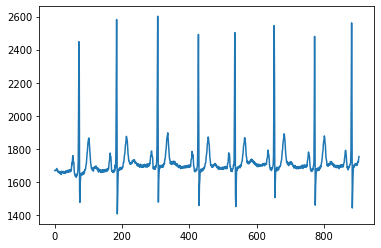

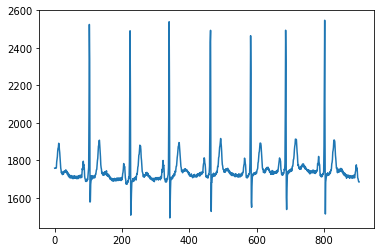

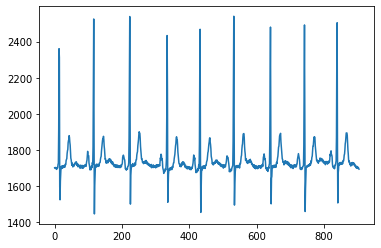

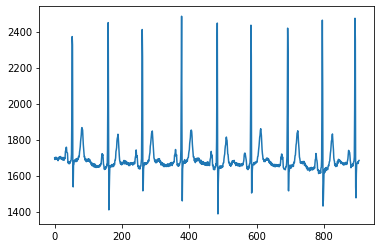

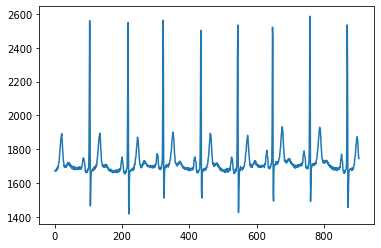

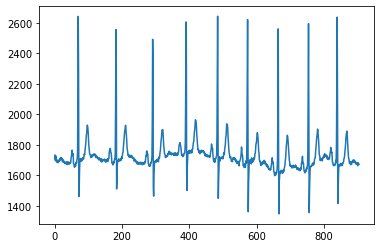

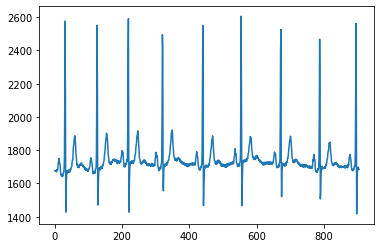

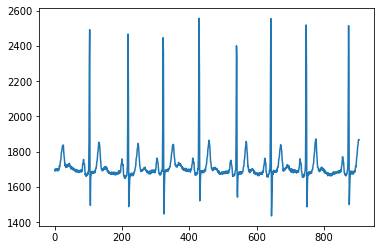

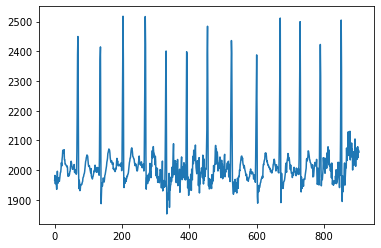

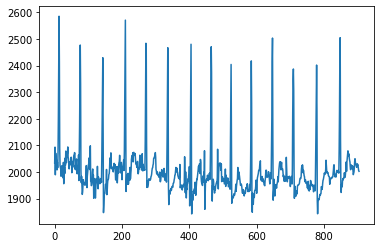

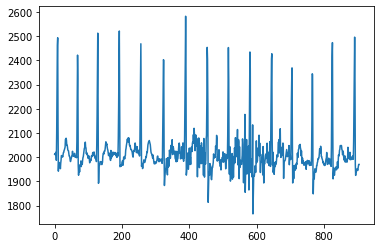

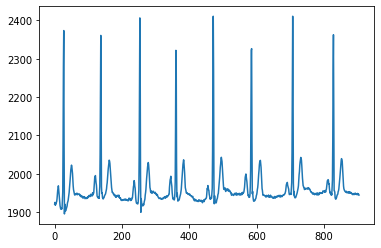

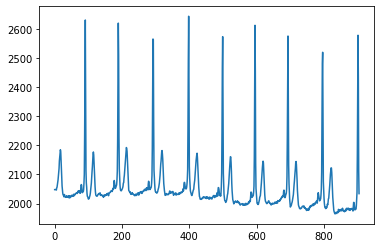

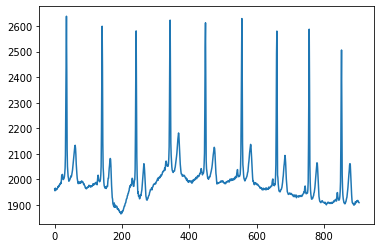

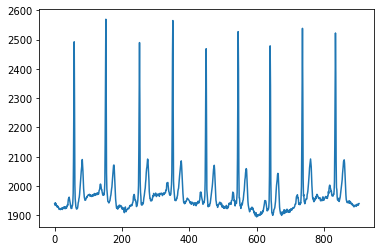

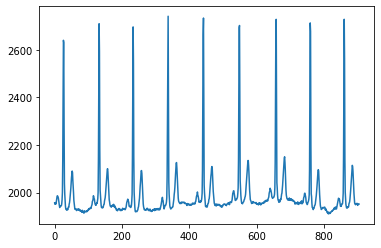

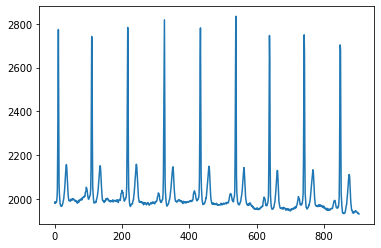

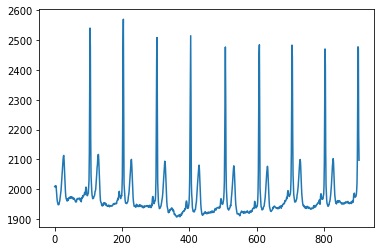

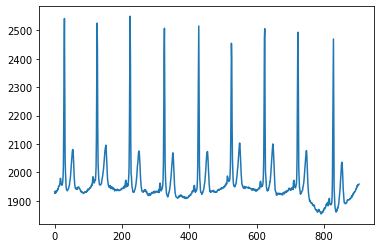

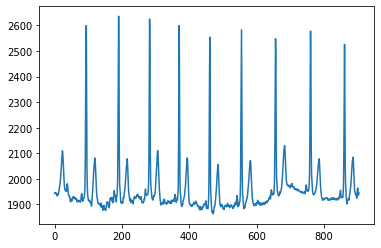

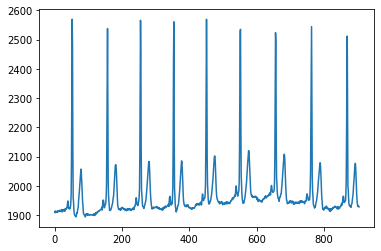

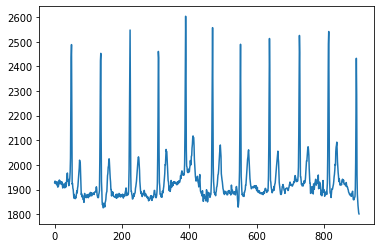

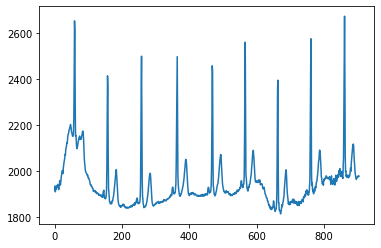

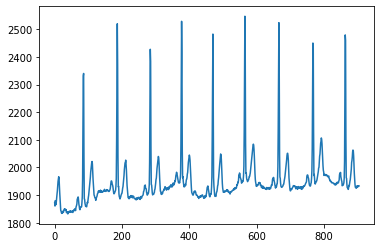

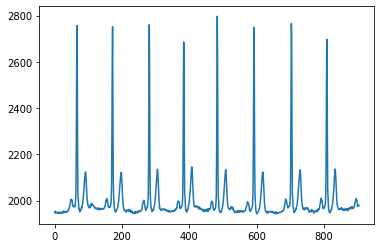

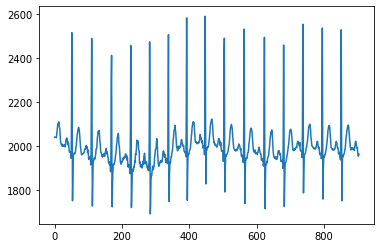

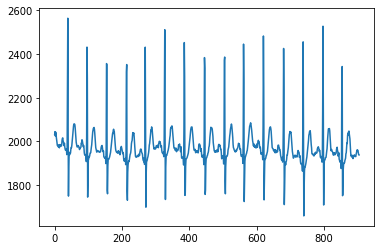

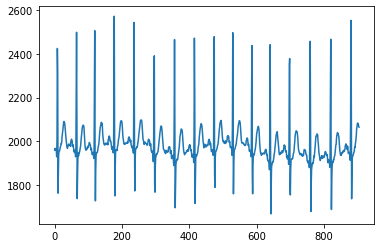

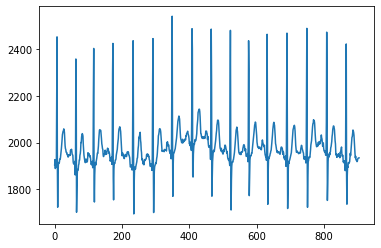

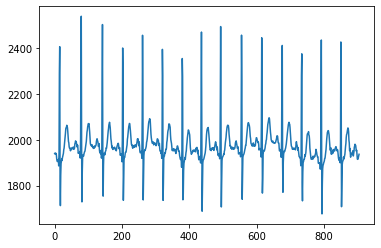

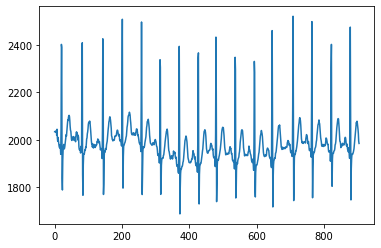

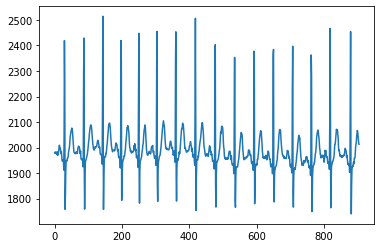

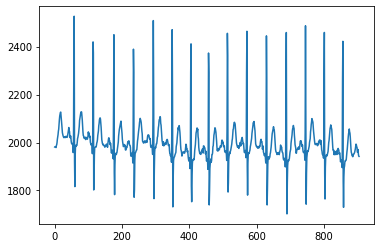

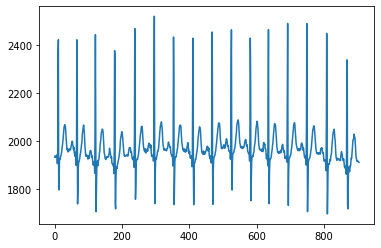

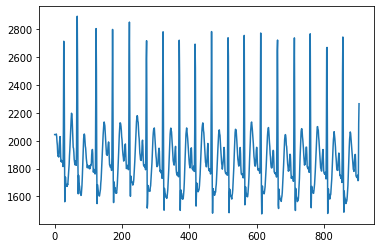

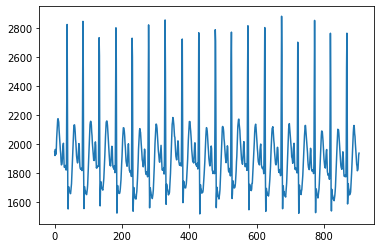

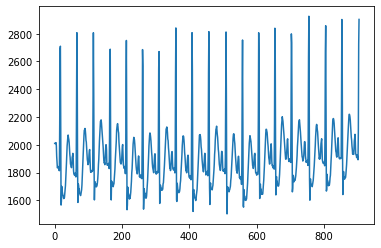

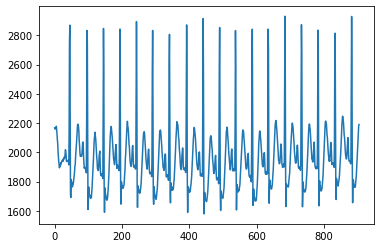

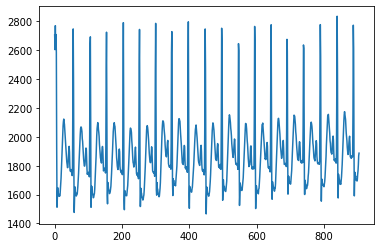

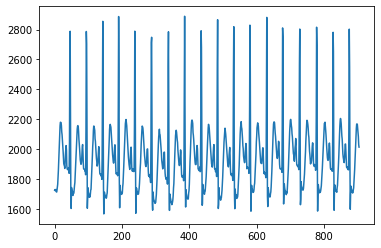

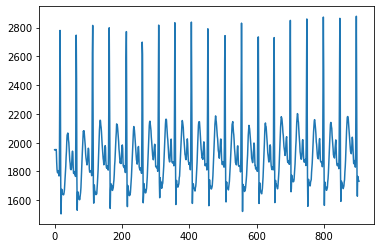

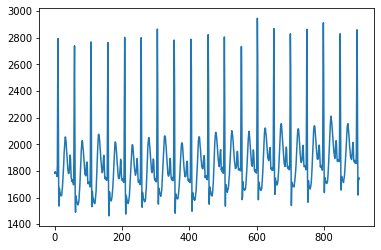

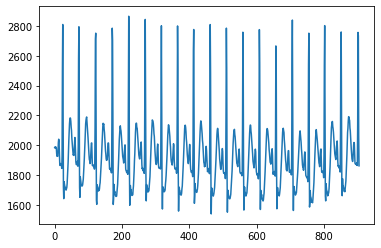

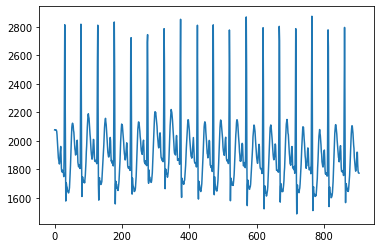

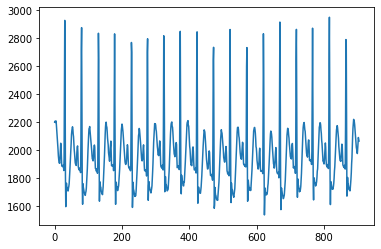

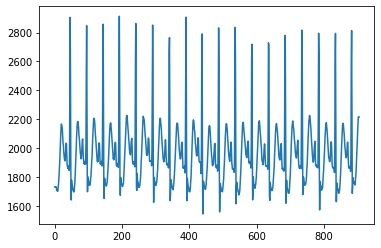

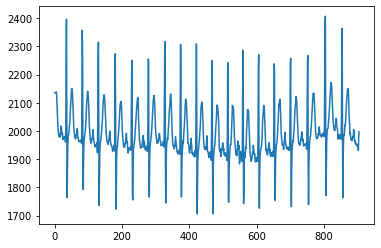

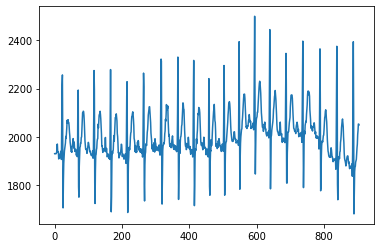

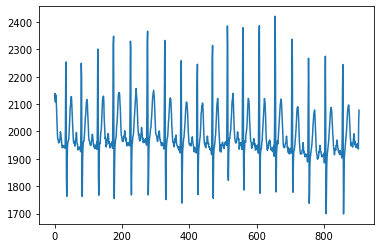

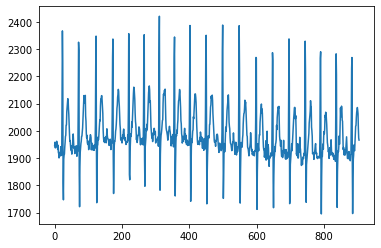

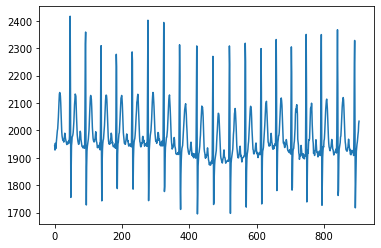

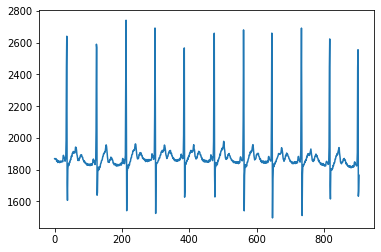

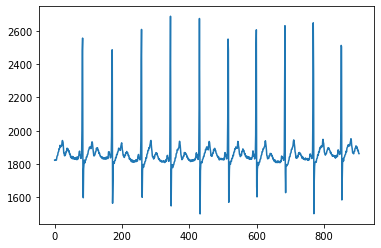

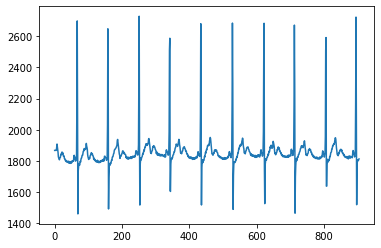

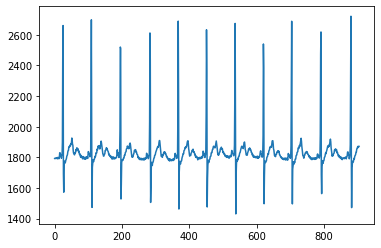

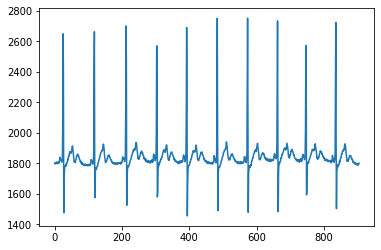

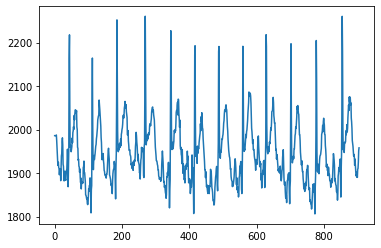

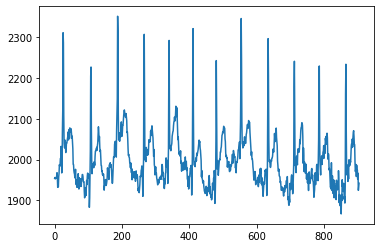

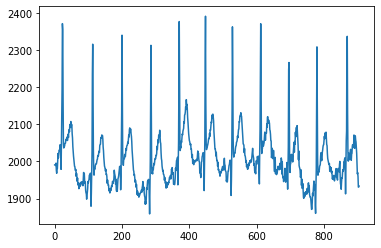

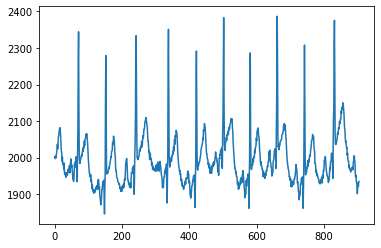

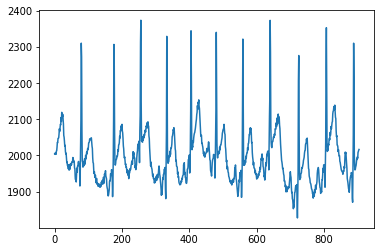

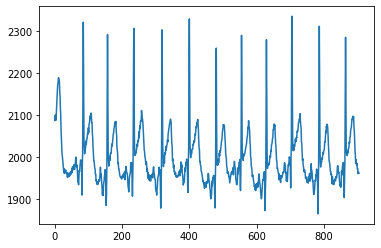

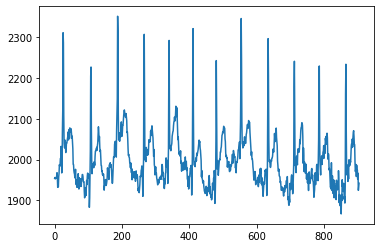

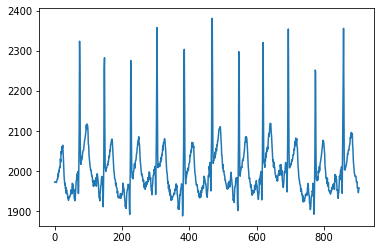

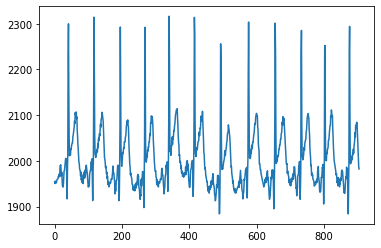

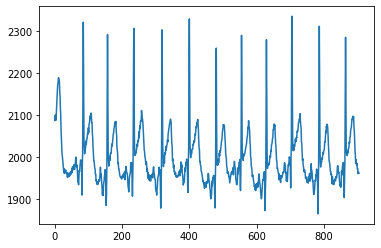

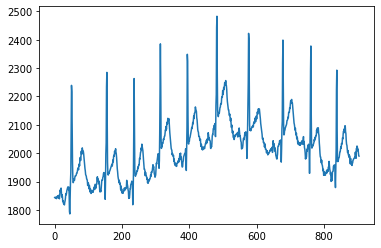

In [574]:
cnt = 0
for k in y_mc:
    if k == 0:
        plt.plot(x_all[cnt])
        plt.show()
    cnt += 1

In [575]:
x_all[0].shape

(905,)

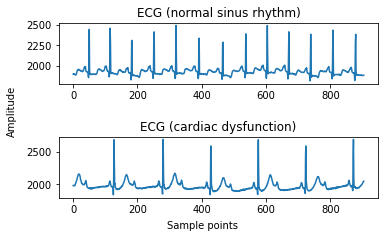

In [576]:
import matplotlib.pyplot as plt

import random
import matplotlib.pyplot as plt



fig = plt.figure(10)

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(x_all[0])
ax2.plot(x_all[999])

# Set common labels
fig.text(0.5, 0.1, 'Sample points', ha='center', va='center')
fig.text(0.06, 0.5, 'Amplitude', ha='center', va='center', rotation='vertical')

ax1.set_title('ECG (normal sinus rhythm)')
ax2.set_title('ECG (cardiac dysfunction)')

plt.tight_layout(pad=4, w_pad=5, h_pad=2)
#plt.show()
plt.savefig('common_labels_text.png', dpi=300)

In [577]:
len(y_b)

1000

In [593]:
x_all = np.load('x_sigs.npy')
fx = np.load('features.npy')
y_mc = np.load('y_mc.npy')

# binary class labels
y_b = np.copy(y_mc)
y_b[y_b<=0] = 0
y_b[y_b>=1] = 1

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(fx)
print(scaler.mean_)
fx = scaler.transform(fx)

print(np.mean(fx))
print(np.std(fx))

scaler = StandardScaler()
scaler.fit(x_all)
print(scaler.mean_)
x_all = scaler.transform(x_all)

print(np.mean(x_all))
print(np.std(x_all))

# train, test  == stratified
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
sss.get_n_splits(fx, y_b)

print(sss)       

for train_index, test_index in sss.split(fx, y_b):
    #print("TRAIN:", train_index, "TEST:", test_index)
    Xs_train, Xf_train, Xs_test, Xf_test = x_all[train_index], fx[train_index], x_all[test_index], fx[test_index]
    y_train, y_test = y_b[train_index], y_b[test_index]
    
    
print(Xs_train.shape)
print(Xf_train.shape)
print(Xs_test.shape)
print(Xf_test.shape)

[3.41630376e+09 5.30983874e+04 1.92863516e+03 2.83265728e+04
 1.49575103e-01 2.29353082e+00 1.50883482e+00 1.88768266e+06
 2.28465042e+04 3.13347044e+01]
2.2888185e-09
1.0
[1939.54332227 1939.74085767 1939.41281592 1939.61006995 1939.88748254
 1938.5862561  1935.9615282  1935.03393872 1933.01937463 1929.41452527
 1927.67719604 1927.12710547 1924.5438844  1928.14370532 1932.65924866
 1935.59666113 1940.7980769  1940.51891864 1938.04563782 1938.12467932
 1942.84025708 1948.78740283 1948.51575757 1944.9199762  1942.4873833
 1942.12449341 1939.88438257 1935.40548395 1934.45792572 1930.19866779
 1929.11641284 1935.67000269 1940.39825525 1938.35425745 1937.18112354
 1936.78556445 1932.73560461 1931.38531689 1934.15939624 1934.8799563
 1934.77831586 1937.38163574 1940.58242017 1942.84743066 1947.02521362
 1945.32968896 1937.2414364  1931.95798413 1927.43270557 1926.72665039
 1929.72789148 1935.80678992 1939.84808154 1939.08205109 1936.49170374
 1936.25115186 1934.89527466 1932.23690723 1932.0

In [594]:
input_shape = (905, 1)
kernel_size = 3
filters = 32
latent_dim = 2

In [595]:
Xs_train = np.reshape(Xs_train, (800, 905,))
Xs_test = np.reshape(Xs_test, (200, 905,))

In [596]:
from keras.utils import to_categorical
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [597]:
from keras.losses import mse
from sklearn.metrics import mean_squared_error
from keras import regularizers

In [598]:
len(y_train[y_train==0])

226

In [599]:
len(y_train[y_train==1])

574

In [618]:
# c-VAE
original_dim = 905
intermediate_dim = 700
latent_dim = 2
num_classes = 2
x = Input(shape=(original_dim,))
h = Dense(intermediate_dim, kernel_regularizer=regularizers.l2(0.1),
                activity_regularizer=regularizers.l1(0.1), bias_regularizer=regularizers.l2(0.3), activation='relu')(x)

z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

y = Input(shape=(num_classes,)) 
yh = Dense(latent_dim)(y) 

def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=K.shape(z_mean))
    return z_mean + K.exp(z_log_var / 2) * epsilon


z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='linear')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

vae = Model([x, y], [x_decoded_mean, yh])

xent_loss = K.mean(K.square(x - x_decoded_mean), axis=-1) # K.sum(K.binary_crossentropy(x, x_decoded_mean), axis=-1) #  # K.sum(K.square(x - x_decoded_mean), axis=-1)

kl_loss = - 0.8 * K.sum(1 + z_log_var - K.square(z_mean - yh) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_122 (InputLayer)          (None, 905)          0                                            
__________________________________________________________________________________________________
dense_313 (Dense)               (None, 700)          634200      input_122[0][0]                  
__________________________________________________________________________________________________
dense_314 (Dense)               (None, 2)            1402        dense_313[0][0]                  
__________________________________________________________________________________________________
dense_315 (Dense)               (None, 2)            1402        dense_313[0][0]                  
__________________________________________________________________________________________________
lambda_91 

In [557]:
Xs_train.min()

-6.234265

In [601]:
ptp = np.ptp(Xs_train)
min_ = np.min(Xs_train)
Xs_train_norm = (Xs_train - min_) / ptp

In [602]:
ptp = np.ptp(Xs_test)
min_ = np.min(Xs_test)
Xs_test_norm = (Xs_test - min_) / ptp

In [603]:
print(np.max(Xs_train_norm))
print(np.min(Xs_train_norm))

1.0
0.0


In [604]:
print(np.max(Xs_test_norm))
print(np.min(Xs_test_norm))

1.0
0.0


In [550]:
y_train_ohe

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [619]:
cvhist = vae.fit([Xs_train, y_train_ohe], 
        shuffle=True,
        epochs=200,
        batch_size=64,
        validation_data=([Xs_test, y_test_ohe], None))

Train on 800 samples, validate on 200 samples
Epoch 1/200
800/800 [==============================] - 5s 6ms/step - loss: 1553.3775 - val_loss: 1433.5192
Epoch 2/200
800/800 [==============================] - 0s 94us/step - loss: 1203.0963 - val_loss: 1323.6067
Epoch 3/200
800/800 [==============================] - 0s 96us/step - loss: 984.3701 - val_loss: 1223.4534
Epoch 4/200
800/800 [==============================] - 0s 80us/step - loss: 799.7788 - val_loss: 1135.1419
Epoch 5/200
800/800 [==============================] - 0s 100us/step - loss: 659.7768 - val_loss: 1067.2038
Epoch 6/200
800/800 [==============================] - 0s 94us/step - loss: 549.8224 - val_loss: 980.6995
Epoch 7/200
800/800 [==============================] - 0s 93us/step - loss: 452.9694 - val_loss: 935.3430
Epoch 8/200
800/800 [==============================] - 0s 95us/step - loss: 382.2413 - val_loss: 858.6324
Epoch 9/200
800/800 [==============================] - 0s 96us/step - loss: 328.2129 - val_loss: 82

800/800 [==============================] - 0s 116us/step - loss: 28.9584 - val_loss: 186.4578
Epoch 78/200
800/800 [==============================] - 0s 106us/step - loss: 28.4649 - val_loss: 179.3499
Epoch 79/200
800/800 [==============================] - 0s 89us/step - loss: 28.5337 - val_loss: 184.5057
Epoch 80/200
800/800 [==============================] - 0s 86us/step - loss: 30.1443 - val_loss: 185.0294
Epoch 81/200
800/800 [==============================] - 0s 89us/step - loss: 29.6828 - val_loss: 173.8011
Epoch 82/200
800/800 [==============================] - 0s 86us/step - loss: 28.0922 - val_loss: 172.4986
Epoch 83/200
800/800 [==============================] - 0s 117us/step - loss: 27.2723 - val_loss: 168.9849
Epoch 84/200
800/800 [==============================] - 0s 117us/step - loss: 27.2692 - val_loss: 181.2934
Epoch 85/200
800/800 [==============================] - 0s 102us/step - loss: 28.9248 - val_loss: 170.8958
Epoch 86/200
800/800 [==============================] 

Epoch 154/200
800/800 [==============================] - 0s 110us/step - loss: 18.9379 - val_loss: 89.2395
Epoch 155/200
800/800 [==============================] - 0s 93us/step - loss: 19.5423 - val_loss: 88.1543
Epoch 156/200
800/800 [==============================] - 0s 80us/step - loss: 19.7964 - val_loss: 88.6946
Epoch 157/200
800/800 [==============================] - 0s 94us/step - loss: 18.6534 - val_loss: 89.6576
Epoch 158/200
800/800 [==============================] - 0s 90us/step - loss: 19.5829 - val_loss: 82.1243
Epoch 159/200
800/800 [==============================] - 0s 69us/step - loss: 18.9791 - val_loss: 93.2034
Epoch 160/200
800/800 [==============================] - 0s 106us/step - loss: 20.1007 - val_loss: 87.3126
Epoch 161/200
800/800 [==============================] - 0s 69us/step - loss: 18.6349 - val_loss: 85.3547
Epoch 162/200
800/800 [==============================] - 0s 106us/step - loss: 18.6553 - val_loss: 85.4379
Epoch 163/200
800/800 [====================

In [329]:
# Reference: https://github.com/bojone/vae

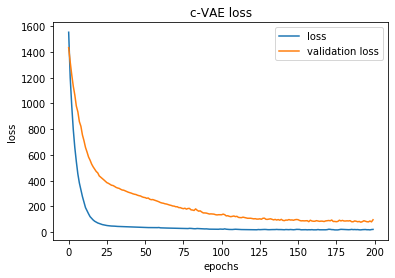

In [651]:
import matplotlib.pyplot as plt

plt.plot(cvhist.history['loss'])
plt.plot(cvhist.history['val_loss'])
#plt.ylim([620, 690])
plt.legend(['loss', 'validation loss'])
plt.title('c-VAE loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('c_vae_loss.png', dpi = 500)
#plt.show()

In [43]:
y_test

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1])

In [110]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [113]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [563]:
x_test_encoded[0]

array([0.18479899, 0.02094701], dtype=float32)

In [564]:
x_test_encoded[1]

array([0.18479899, 0.02094701], dtype=float32)

In [617]:
x_test_encoded

array([[-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991, -0.33266652],
       [-0.03268991,

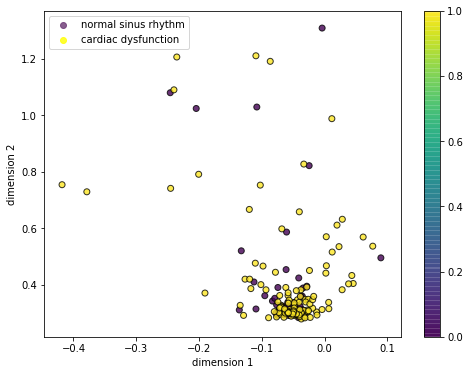

In [648]:
encoder = Model(x, z_mean)

x_test_encoded = encoder.predict(Xs_test, batch_size=1024)
plt.figure(figsize=(8, 6))


dim1_y0 = []
dim2_y0 = []
y0 = []
dim1_y1 = []
dim2_y1 = []
y1 = []
idx = 0 
for y_n in y_test:
    if y_n == 0:
        dim1_y0.append(x_test_encoded[idx, 0])
        dim2_y0.append(x_test_encoded[idx, 1])
        y0.append(0)
    if y_n == 1:
        dim1_y1.append(x_test_encoded[idx, 0])
        dim2_y1.append(x_test_encoded[idx, 1])
        y1.append(1)
    idx += 1
        
plt.scatter(dim1_y0, dim2_y0, linewidths = 1, alpha = 0.8, edgecolors = 'black',  c=y0)
plt.scatter(dim1_y1, dim2_y1, linewidths = 1, alpha = 0.8, edgecolors = 'black', c=y1)
plt.colorbar()
p0 = plt.xlabel('dimension 1')
p1 = plt.ylabel('dimension 2')

plt.legend(['normal sinus rhythm', 'cardiac dysfunction'])

ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('#6A3672')
leg.legendHandles[1].set_color('yellow')
plt.clim(0,1)
plt.savefig('test_embedding.png', dpi = 500)

In [629]:
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

mu = Model(y, yh)
mu = mu.predict(np.eye(num_classes))

In [630]:
mu

array([[-0.04885307,  0.3120762 ],
       [-0.05010041,  0.31150156]], dtype=float32)

In [634]:
x_gen0 = []
x_gen1 = []

In [626]:
norm.ppf(np.linspace(0.35, 0.65, n))

array([-0.38532047, -0.18911843,  0.        ,  0.18911843,  0.38532047])

In [633]:
20*20

400

In [635]:
n = 20
digit_size = 905
figure = np.zeros((digit_size * n, digit_size * n))

output_digit = 0
grid_x = norm.ppf(np.linspace(0.35, 0.65, n)) + mu[output_digit][1]
grid_y = norm.ppf(np.linspace(0.35, 0.65, n)) + mu[output_digit][0]

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, 1)
        x_gen0.append(digit)
        
output_digit = 1
grid_x = norm.ppf(np.linspace(0.35, 0.65, n)) + mu[output_digit][1]
grid_y = norm.ppf(np.linspace(0.35, 0.65, n)) + mu[output_digit][0]

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, 1)
        x_gen1.append(digit)

In [636]:
x_gen0 = np.array(x_gen0)
x_gen0 = np.reshape(x_gen0, (400, 905,1))

In [637]:
x_gen1 = np.array(x_gen1)
x_gen1 = np.reshape(x_gen1, (400, 905,1))

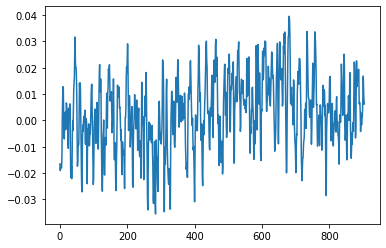

In [638]:
plt.plot(x_gen0[0,:,:])
plt.show()

In [639]:
np.save('xgen0.npy', x_gen0)
np.save('xgen1.npy', x_gen1)

In [250]:
y_train[1]

0

In [452]:
x_gen0.shape

(25, 905, 1)

In [87]:
grid_x

array([-1.38488928, -0.33779578,  0.25996435,  0.85772447,  1.90481797])

In [88]:
grid_y

array([-1.32954553, -0.28245203,  0.31530809,  0.91306822,  1.96016172])

In [94]:
grid_x

array([0.8707712 , 0.88879815, 0.90679019, 0.92475326, 0.94269323,
       0.96061591, 0.9785271 , 0.99643254, 1.01433799, 1.03224917,
       1.05017186, 1.06811183, 1.08607489, 1.10406694, 1.12209389])

In [95]:
grid_y

array([-0.24273835, -0.2247114 , -0.20671936, -0.18875629, -0.17081633,
       -0.15289364, -0.13498245, -0.11707701, -0.09917156, -0.08126038,
       -0.06333769, -0.04539772, -0.02743466, -0.00944262,  0.00858434])

In [355]:
x_all[0]

array([-2.39752784e-01, -2.17319906e-01, -2.46364757e-01, -2.26123363e-01,
       -2.29870930e-01, -2.34394118e-01, -2.39335269e-01, -2.61907667e-01,
       -2.54152507e-01, -2.13926956e-01, -1.42550722e-01, -3.78048867e-02,
        4.93589714e-02,  8.81258324e-02,  9.35677364e-02,  1.03404313e-01,
        5.73176444e-02,  9.70750973e-02,  9.37368646e-02,  7.97801465e-02,
        3.92521322e-02, -2.39164960e-02, -4.45430279e-02, -4.07587178e-03,
        1.44707821e-02, -2.78882999e-02, -1.73561163e-02, -1.43194050e-02,
       -9.54444427e-03, -4.16364614e-03,  2.06786525e-02,  3.78486863e-03,
        6.53835163e-02,  1.13508977e-01,  2.00150669e-01,  2.69295454e-01,
        2.47217447e-01,  3.17905039e-01,  3.16048145e-01,  1.23538159e-01,
       -1.35091424e-03, -2.64402982e-02, -6.47442490e-02, -9.81592909e-02,
       -1.05358414e-01, -1.07446156e-01, -7.13527575e-02, -3.43420267e-01,
       -4.14503098e-01,  1.60362196e+00,  2.99594760e+00,  1.17542803e-01,
       -2.23124459e-01, -

In [455]:
from keras.models import load_model

model_lstm = load_model('lstm.h5')

In [456]:
model_lstm.predict(x_gen0)

array([[0.26665044, 0.73334956],
       [0.266643  , 0.733357  ],
       [0.2666359 , 0.7333641 ],
       [0.26662883, 0.7333712 ],
       [0.2666215 , 0.7333785 ],
       [0.2666489 , 0.7333511 ],
       [0.26664153, 0.73335844],
       [0.26663443, 0.7333656 ],
       [0.26662734, 0.7333726 ],
       [0.26661998, 0.73338   ],
       [0.26664746, 0.7333525 ],
       [0.26664007, 0.73335993],
       [0.26663294, 0.733367  ],
       [0.2666259 , 0.73337406],
       [0.26661858, 0.7333814 ],
       [0.266646  , 0.733354  ],
       [0.2666386 , 0.7333614 ],
       [0.26663154, 0.73336846],
       [0.26662448, 0.7333755 ],
       [0.26661715, 0.7333829 ],
       [0.26664457, 0.73335546],
       [0.26663718, 0.7333628 ],
       [0.26663005, 0.73336995],
       [0.26662296, 0.73337704],
       [0.26661563, 0.7333844 ]], dtype=float32)

In [461]:
model_lstm.predict(x_gen1)

array([[0.26665044, 0.73334956],
       [0.266643  , 0.733357  ],
       [0.26663586, 0.7333641 ],
       [0.26662886, 0.73337114],
       [0.26662147, 0.7333785 ],
       [0.2666489 , 0.7333511 ],
       [0.2666415 , 0.7333585 ],
       [0.26663443, 0.7333656 ],
       [0.26662734, 0.7333726 ],
       [0.26661998, 0.73338   ],
       [0.26664746, 0.7333525 ],
       [0.26664007, 0.73335993],
       [0.26663297, 0.733367  ],
       [0.2666259 , 0.73337406],
       [0.26661858, 0.7333814 ],
       [0.26664606, 0.733354  ],
       [0.26663864, 0.73336136],
       [0.26663154, 0.73336846],
       [0.26662448, 0.7333755 ],
       [0.26661715, 0.7333829 ],
       [0.26664454, 0.73335546],
       [0.26663718, 0.7333628 ],
       [0.26663005, 0.73336995],
       [0.26662296, 0.73337704],
       [0.26661563, 0.7333844 ]], dtype=float32)